In [71]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

1 Завдання

In [72]:
column_names = ["Number of times pregnant", "Plasma glucose concentration", "Diastolic blood pressure (mm Hg)", "Triceps skin fold thickness (mm)", "2-Hour serum insulin (mu U/ml)", "Body mass index", "Diabetes pedigree function", "Age (years)", "Class variable (0 or 1)"]
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', names=column_names)
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
train_data, test_data = train_test_split(df, test_size=0.30, random_state=42)

In [74]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.iloc[:, :-1])
test_scaled = scaler.transform(test_data.iloc[:, :-1])
X_train = pd.DataFrame(train_scaled, columns=train_data.columns[:-1])
X_test = pd.DataFrame(test_scaled, columns=test_data.columns[:-1])
y_train = train_data.iloc[:, -1]

X = train_data.iloc[:, 0:8]
y = train_data.iloc[:, 8]
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).reshape(-1, 1)

In [75]:
model = nn.Sequential (
nn.Linear(8, 12),
nn.ReLU(),
nn.Linear(12, 8),
nn.ReLU(),
nn.Linear(8, 1),
nn.Sigmoid()
)

In [76]:
loss_fn = nn.BCELoss() # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epochs = 100
batch_size = 10
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Точність: {accuracy}")

Точність: 0.7579143643379211


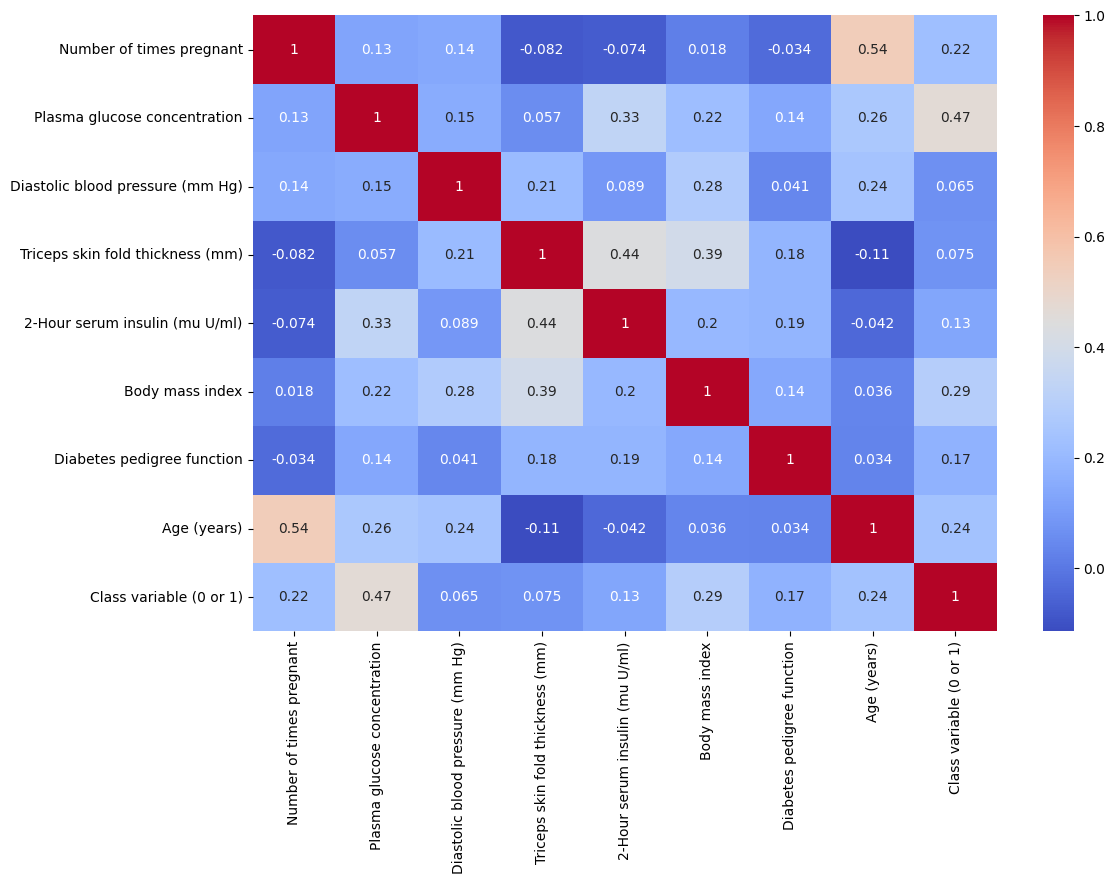

In [77]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

2 Завдання

In [78]:
walk_accelerometer_data = pd.read_csv('C:/Users/nkova/Lab3/walk/Accelerometer.csv')
walk_gyroscope_data = pd.read_csv('C:/Users/nkova/Lab3/walk/Gyroscope.csv')

run_accelerometer_data = pd.read_csv('C:/Users/nkova/Lab3/run/Accelerometer.csv')
run_gyroscope_data = pd.read_csv('C:/Users/nkova/Lab3/run/Gyroscope.csv')

squatting_accelerometer_data = pd.read_csv('C:/Users/nkova/Lab3/squatting/Accelerometer.csv')
squatting_gyroscope_data = pd.read_csv('C:/Users/nkova/Lab3/squatting/Gyroscope.csv')

In [79]:
walk_accelerometer_data.columns = [f'accel_{col}' for col in walk_accelerometer_data.columns]
walk_gyroscope_data.columns = [f'gyro_{col}' for col in walk_gyroscope_data.columns]
run_accelerometer_data.columns = [f'accel_{col}' for col in run_accelerometer_data.columns]
run_gyroscope_data.columns = [f'gyro_{col}' for col in run_gyroscope_data.columns]
squatting_accelerometer_data.columns = [f'accel_{col}' for col in squatting_accelerometer_data.columns]
squatting_gyroscope_data.columns = [f'gyro_{col}' for col in squatting_gyroscope_data.columns]
# Об'єднання даних
walk_data = pd.concat([walk_accelerometer_data, walk_gyroscope_data], axis=1)
run_data = pd.concat([run_accelerometer_data, run_gyroscope_data], axis=1)
squat_data = pd.concat([squatting_accelerometer_data, squatting_gyroscope_data], axis=1)
# Додавання міток активності
walk_data['activity'] = '0'
run_data['activity'] = '1'
squat_data['activity'] = '2'
# Об'єднання всіх даних
all_data = pd.concat([walk_data, run_data, squat_data], ignore_index=True)
all_data.head()

,accel_time,accel_seconds_elapsed,accel_z,accel_y,accel_x,gyro_time,gyro_seconds_elapsed,gyro_z,gyro_y,gyro_x,activity
0,1.717011e+18,0.093537,1.762593,0.581862,-0.348343,1717011034562616300,0.053616,0.017104,0.141110,-0.009774,0
1,1.717011e+18,0.133516,-0.751598,-0.991150,1.519213,1717011034602626800,0.093627,0.017104,0.141110,-0.009774,0
2,1.717011e+18,0.193513,-3.007939,-0.943558,0.454231,1717011034642610400,0.133610,-1.241278,-1.804496,1.861306,0
3,1.717011e+18,0.253510,1.740246,1.974828,-4.152980,1717011034682617900,0.173618,-2.345112,-2.946814,0.869261,0
4,1.717011e+18,0.313539,0.361974,-0.969770,2.135663,1717011034722627000,0.213627,-2.958420,-0.590707,-0.168599,0


In [80]:
if all_data.isnull().values.any():
    print("Data contains NaN values. Filling with zeros.")
    all_data = all_data.fillna(0)
    
all_data.head()

Data contains NaN values. Filling with zeros.


,accel_time,accel_seconds_elapsed,accel_z,accel_y,accel_x,gyro_time,gyro_seconds_elapsed,gyro_z,gyro_y,gyro_x,activity
0,1.717011e+18,0.093537,1.762593,0.581862,-0.348343,1717011034562616300,0.053616,0.017104,0.141110,-0.009774,0
1,1.717011e+18,0.133516,-0.751598,-0.991150,1.519213,1717011034602626800,0.093627,0.017104,0.141110,-0.009774,0
2,1.717011e+18,0.193513,-3.007939,-0.943558,0.454231,1717011034642610400,0.133610,-1.241278,-1.804496,1.861306,0
3,1.717011e+18,0.253510,1.740246,1.974828,-4.152980,1717011034682617900,0.173618,-2.345112,-2.946814,0.869261,0
4,1.717011e+18,0.313539,0.361974,-0.969770,2.135663,1717011034722627000,0.213627,-2.958420,-0.590707,-0.168599,0


In [81]:
# Функції для обчислення статистик
def calculate_std_within_window(window):
    return np.std(window)

def calculate_mean_activity_within_window(window):
    return round(np.mean(window))

def calculate_median_within_window(window):
    return np.median(window)

# Розділення датасету на вікна
window_size = 30
num_windows = len(all_data) // window_size
windows = [all_data.iloc[i*window_size:(i+1)*window_size] for i in range(num_windows)]

# Обчислення статистик для кожного вікна
accel_z_std_list = []
accel_y_std_list = []
accel_x_std_list = []
gyro_z_std_list = []
gyro_y_std_list = []
gyro_x_std_list = []
accel_z_median_list = []
accel_y_median_list = []
accel_x_median_list = []
gyro_z_median_list = []
gyro_y_median_list = []
gyro_x_median_list = []
activity_list = []

for window in windows:
    accel_z_std = calculate_std_within_window(window['accel_z'])
    accel_y_std = calculate_std_within_window(window['accel_y'])
    accel_x_std = calculate_std_within_window(window['accel_x'])
    gyro_z_std = calculate_std_within_window(window['gyro_z'])
    gyro_y_std = calculate_std_within_window(window['gyro_y'])
    gyro_x_std = calculate_std_within_window(window['gyro_x'])
    
    accel_z_median = calculate_median_within_window(window['accel_z'])
    accel_y_median = calculate_median_within_window(window['accel_y'])
    accel_x_median = calculate_median_within_window(window['accel_x'])
    gyro_z_median = calculate_median_within_window(window['gyro_z'])
    gyro_y_median = calculate_median_within_window(window['gyro_y'])
    gyro_x_median = calculate_median_within_window(window['gyro_x'])
    
    window.loc[:, 'activity'] = pd.to_numeric(window['activity'])
    activity = calculate_mean_activity_within_window(window['activity'])
    
    accel_z_std_list.append(accel_z_std)
    accel_y_std_list.append(accel_y_std)
    accel_x_std_list.append(accel_x_std)
    gyro_z_std_list.append(gyro_z_std)
    gyro_y_std_list.append(gyro_y_std)
    gyro_x_std_list.append(gyro_x_std)
    
    accel_z_median_list.append(accel_z_median)
    accel_y_median_list.append(accel_y_median)
    accel_x_median_list.append(accel_x_median)
    gyro_z_median_list.append(gyro_z_median)
    gyro_y_median_list.append(gyro_y_median)
    gyro_x_median_list.append(gyro_x_median)
    
    activity_list.append(activity)

# Створення нового датасету з обчисленими значеннями
new_data = pd.DataFrame({
    'accel_z_std': accel_z_std_list,
    'accel_y_std': accel_y_std_list,
    'accel_x_std': accel_x_std_list,
    'gyro_z_std': gyro_z_std_list,
    'gyro_y_std': gyro_y_std_list,
    'gyro_x_std': gyro_x_std_list,
    'accel_z_median': accel_z_median_list,
    'accel_y_median': accel_y_median_list,
    'accel_x_median': accel_x_median_list,
    'gyro_z_median': gyro_z_median_list,
    'gyro_y_median': gyro_y_median_list,
    'gyro_x_median': gyro_x_median_list,
    'activity': activity_list
})

# Перемішування даних
new_data_shuffled = new_data.sample(frac=1)
new_data_shuffled.head()

,accel_z_std,accel_y_std,accel_x_std,gyro_z_std,gyro_y_std,gyro_x_std,accel_z_median,accel_y_median,accel_x_median,gyro_z_median,gyro_y_median,gyro_x_median,activity
470,0.000000,0.000000,0.000000,1.390495,0.664386,0.607296,0.000000,0.000000,0.000000,-0.108734,0.165239,-0.142637,2
374,1.946202,4.148931,2.736148,1.256692,0.555505,0.659644,0.192289,0.000053,0.605664,0.514043,0.022297,0.066584,2
38,0.742202,2.518559,3.237753,1.242234,0.358082,0.550181,-0.589809,-0.204529,2.391478,-0.084910,0.056810,-0.056505,0
51,1.913568,2.958210,2.445827,1.088426,0.415474,0.776121,-0.372232,-1.194926,1.291838,-0.001222,0.003360,-0.135918,0
263,3.043447,7.723289,5.105397,3.228699,1.254377,1.529932,-4.224240,3.717233,4.799681,-0.206167,-0.651793,-1.498758,1


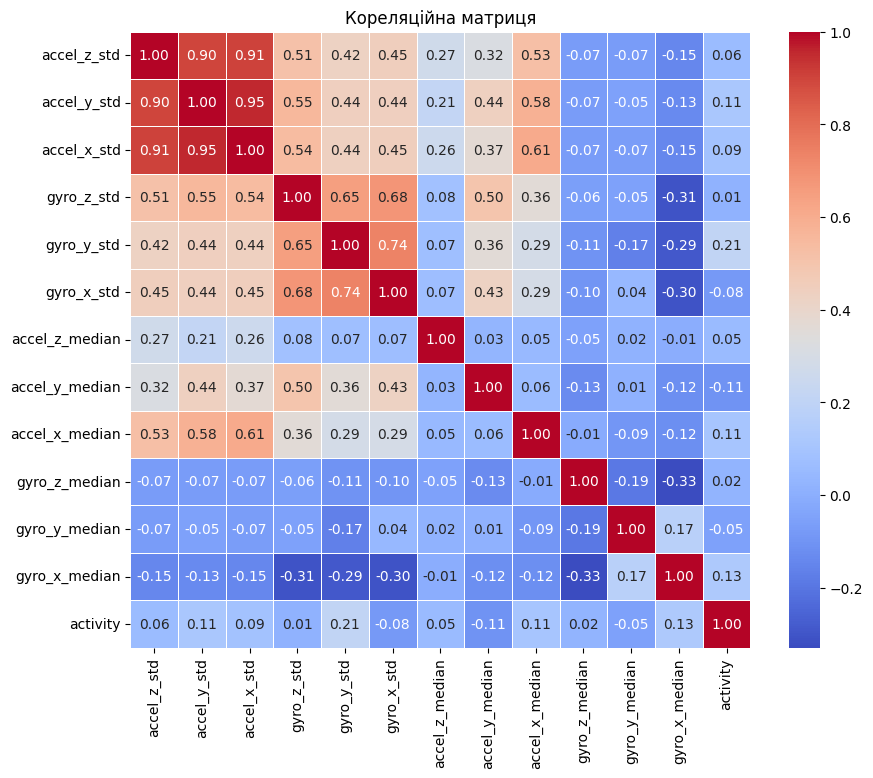

In [82]:
correlation_matrix = new_data_shuffled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

In [83]:
features = new_data_shuffled.iloc[:, :-1]
target = new_data_shuffled['activity']

# Розбиття даних на тренувальний та валідаційний набори
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [84]:
# Конвертація даних у тензори PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.long)

# Створення класу моделі
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Збільшена кількість нейронів
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Ініціалізація моделі та визначення гіперпараметрів
input_size = X_train.shape[1]
output_size = len(new_data['activity'].unique())
model = NeuralNetwork(input_size, output_size)

# Ініціалізація вагів
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
        nn.init.constant_(m.bias, 0)

model.apply(init_weights)

NeuralNetwork(
  (fc1): Linear(in_features=12, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [85]:
# Визначення втрати та оптимізатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Зменшення швидкості навчання

# Тренування моделі
num_epochs = 500 # Збільшення кількості епох
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Оцінка точності моделі
model.eval()
with torch.no_grad():
    val_output = model(X_val)
    _, predicted = torch.max(val_output, 1)
    correct = (predicted == y_val).sum().item()
    accuracy = correct / len(y_val)

# Виведення значення точності
print(f"Validation Accuracy: {accuracy}")

Epoch [20/500], Loss: 1.6232
Epoch [40/500], Loss: 1.5176
Epoch [60/500], Loss: 1.4038
Epoch [80/500], Loss: 1.2572
Epoch [100/500], Loss: 1.2344
Epoch [120/500], Loss: 1.1762
Epoch [140/500], Loss: 1.1439
Epoch [160/500], Loss: 0.9598
Epoch [180/500], Loss: 1.0330
Epoch [200/500], Loss: 0.9536
Epoch [220/500], Loss: 0.9157
Epoch [240/500], Loss: 0.8753
Epoch [260/500], Loss: 0.7427
Epoch [280/500], Loss: 0.7809
Epoch [300/500], Loss: 0.7880
Epoch [320/500], Loss: 0.8011
Epoch [340/500], Loss: 0.6523
Epoch [360/500], Loss: 0.7210
Epoch [380/500], Loss: 0.6778
Epoch [400/500], Loss: 0.6527
Epoch [420/500], Loss: 0.6443
Epoch [440/500], Loss: 0.6383
Epoch [460/500], Loss: 0.5943
Epoch [480/500], Loss: 0.6358
Epoch [500/500], Loss: 0.5695
Validation Accuracy: 0.8410596026490066
